#### Imports

I am starting with standard data science libraries: `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data

In [38]:
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


307511 loans events with 122 features (variables) including the `TARGET`, which we want predict.

In [39]:
app_test = pd.read_csv('data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In the test set is missing a `TARGET` column.

# Exploratory Data Analysis

#### The Distribution of the Target

The target is either a 0 when the loan was repaid on time, or a 1, when the client had payment difficulties.

In [40]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

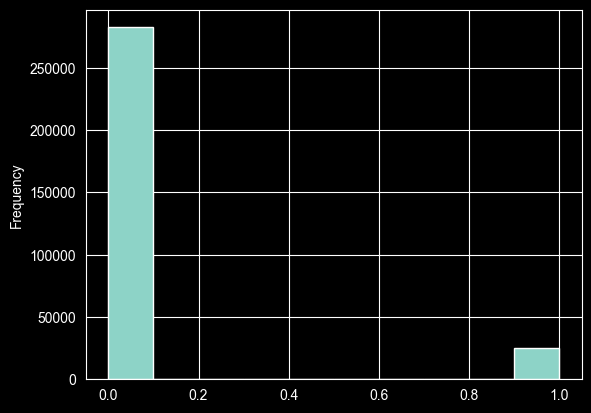

In [41]:
plt.style.use('dark_background')
app_train['TARGET'].astype(int).plot.hist();
plt.savefig("output-7", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

We see an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid.

#### Missing Values

In [42]:
def missing_values_table(df):

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [43]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [44]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


#### Columns

Number of columns of each data type. `int64`, `float64` and `object`.

In [45]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

#### Encoding Categorical Variables


In [46]:
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:

            le.fit(app_train[col])

            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [47]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Data

In [48]:
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = train_labels
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


#### Anomalies

In [49]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [50]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [51]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

#### Pearson Correlations
0.00-0.19 “very weak”; 0.20-0.39 “weak”; 0.40-0.59 “moderate”; 0.60-0.79 “strong”; 0.80-1.0 “very strong”


In [52]:
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

#### Effect of Age

In [53]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

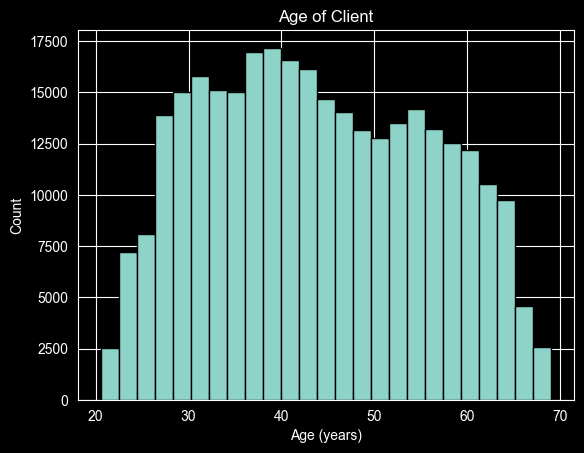

In [54]:
plt.style.use('dark_background')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

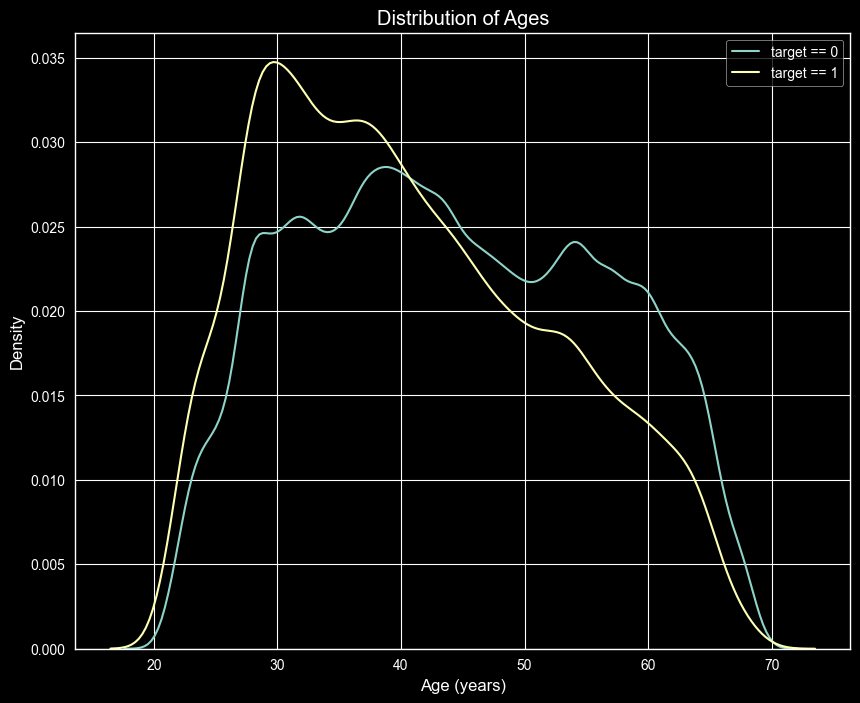

In [112]:

plt.style.use('dark_background')
plt.figure(figsize = (10, 8))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.savefig("output-8", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [56]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [57]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


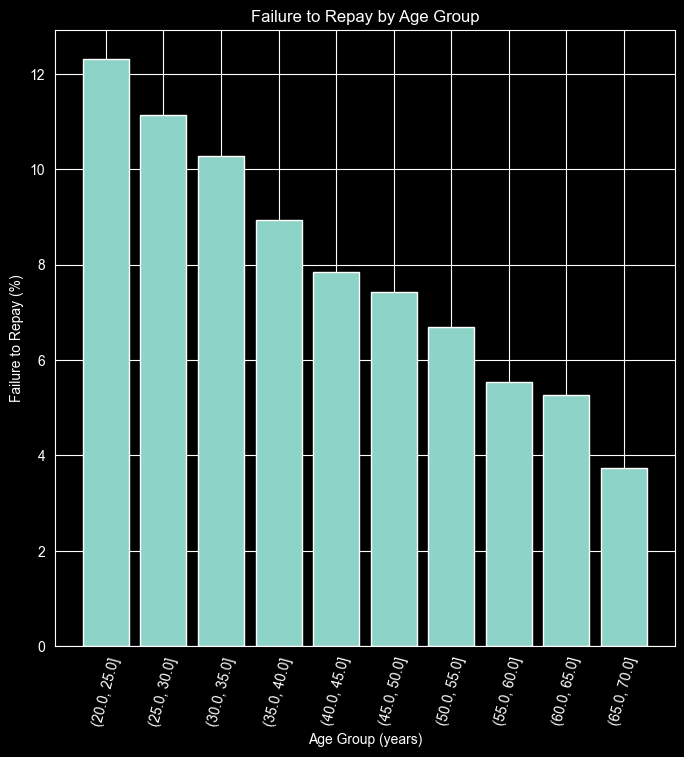

In [58]:
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
plt.savefig("output-2", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

#### Exterior Sources


In [59]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs
print(app_train['EXT_SOURCE_1'].describe)

<bound method NDFrame.describe of 0         0.083037
1         0.311267
2              NaN
3              NaN
4              NaN
            ...   
307506    0.145570
307507         NaN
307508    0.744026
307509         NaN
307510    0.734460
Name: EXT_SOURCE_1, Length: 307511, dtype: float64>


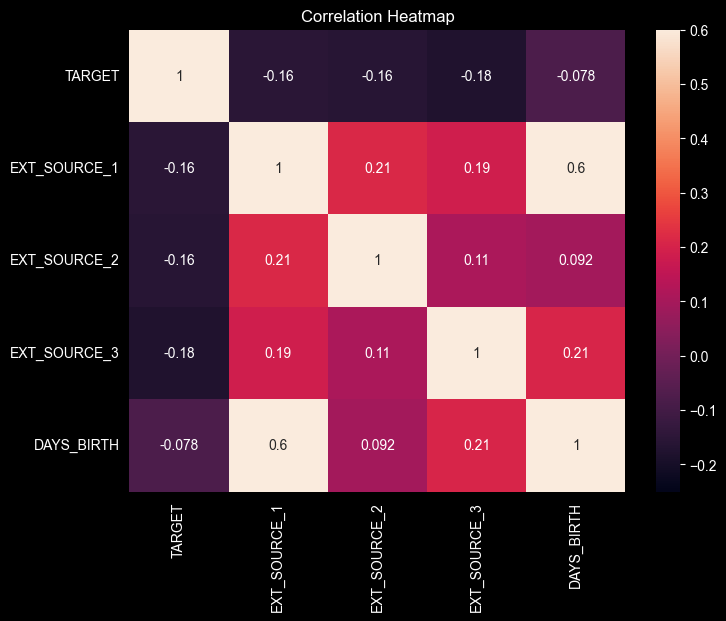

In [60]:
plt.style.use('dark_background')
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs,  vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');
plt.savefig("output-3", bbox_inches="tight",
           pad_inches=0.3, transparent=True)

pip uninstall matplotlib
pip install matplotlib==3.7.3

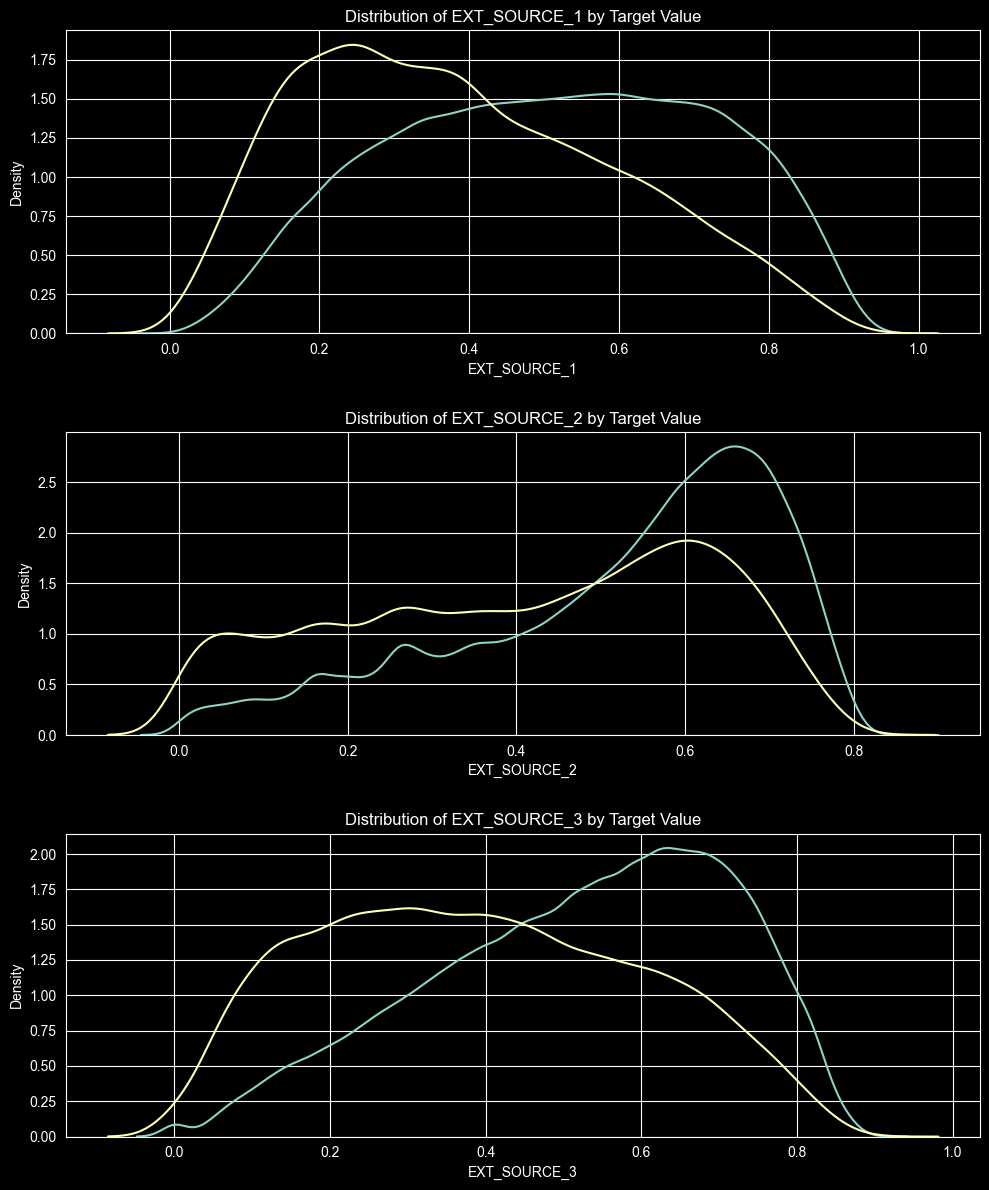

In [61]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)


## Pairs Plot

## Pairs Plot

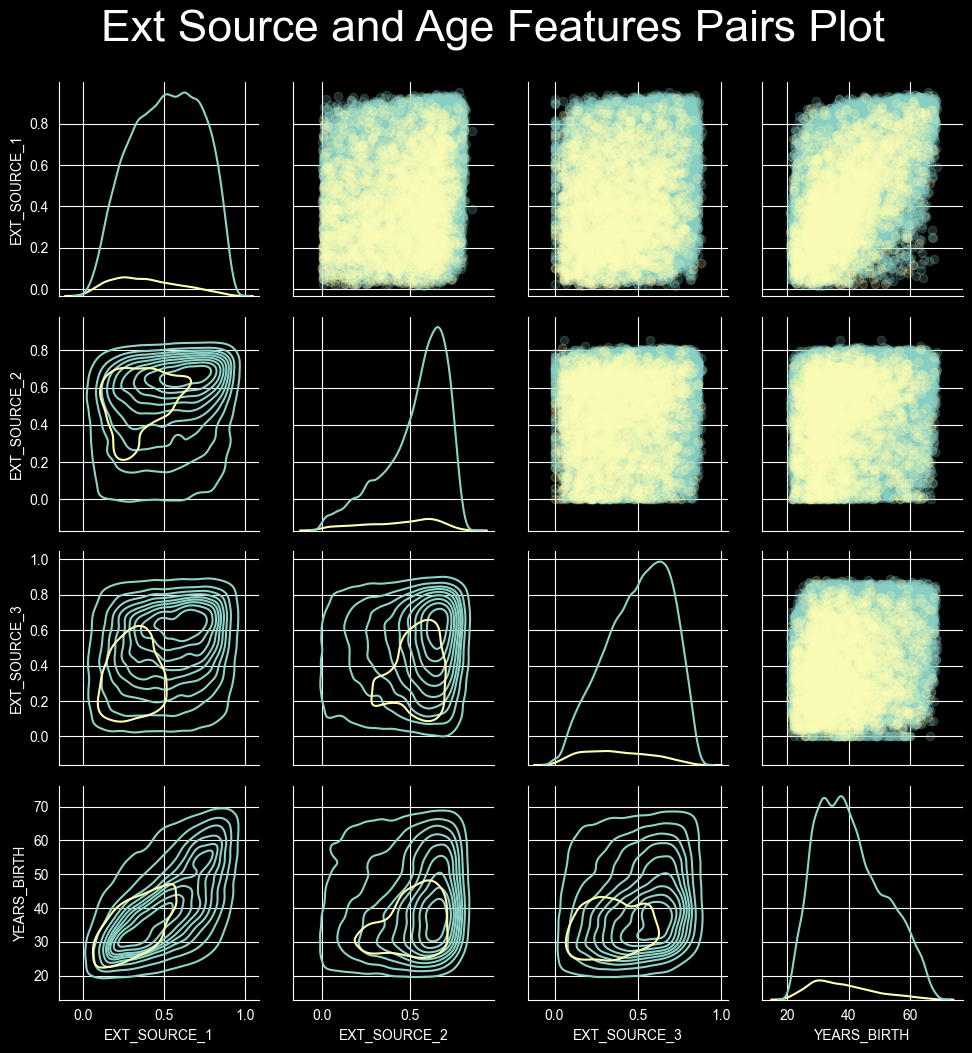

In [62]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)


grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET',
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);
plt.savefig("output-4", bbox_inches="tight",
            pad_inches=0.3, transparent=True)


# Feature Engineering


## Polynomial Features

In [63]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

In [64]:
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [65]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [66]:
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [67]:
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


## Domain Knowledge Features

In [68]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [69]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

####  New Variables

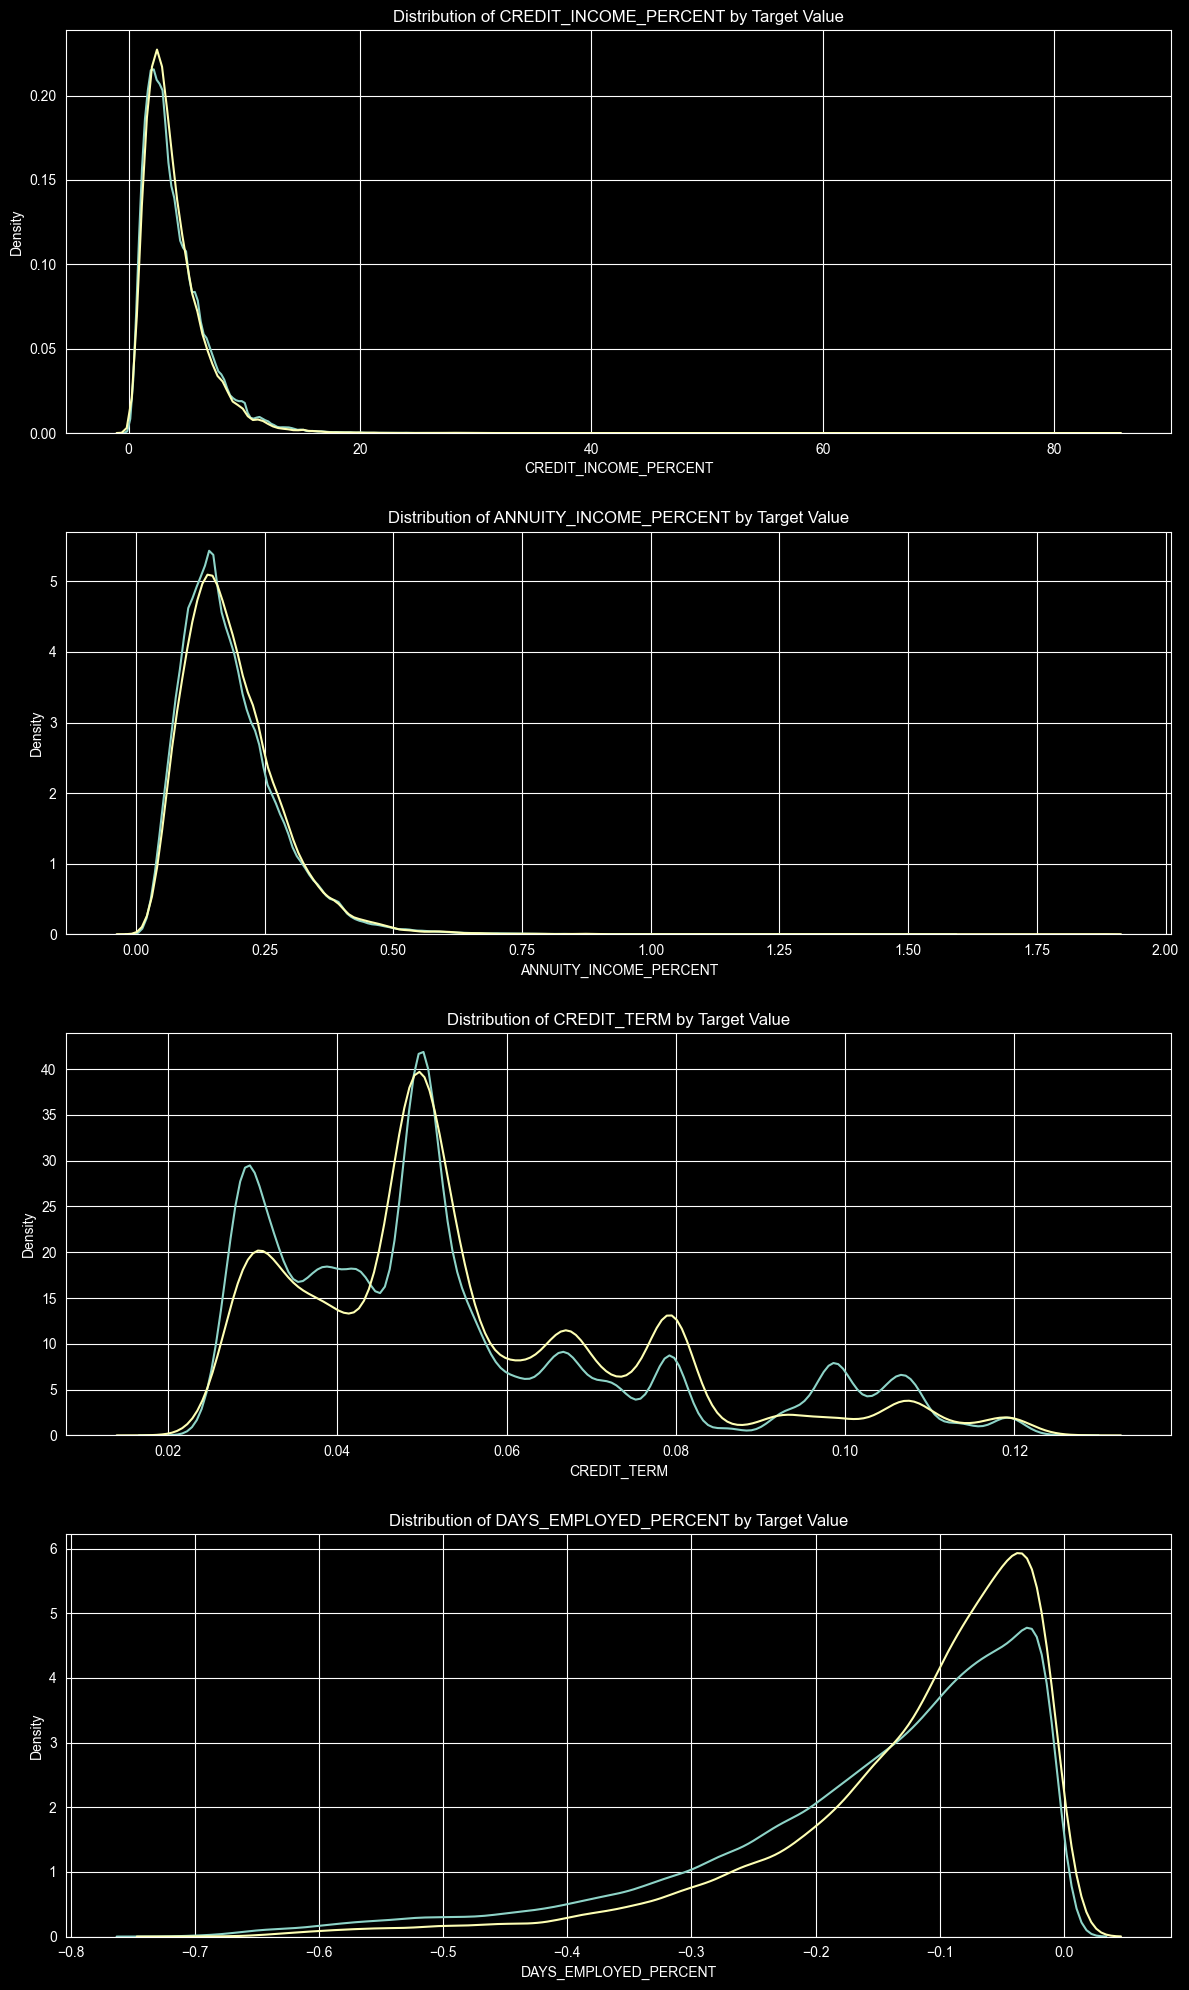

In [70]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    plt.subplot(4, 1, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

# Baseline

AUC ROC: 0.5

## Logistic Regression Implementation

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.model_selection import train_test_split



if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
features = list(train.columns)


test = app_test.copy()


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)


train = imputer.transform(train)
test = imputer.transform(app_test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)



X = app_train.drop('TARGET',axis=1)

y = app_train['TARGET']
X_imputed_array = imputer.fit_transform(X)
X= pd.DataFrame(data=X_imputed_array, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
imputer.fit(X)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, space_eval

def objective(params):
    model = LogisticRegression(**params, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -5, 2),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
}

# Hyperparameter tuning using Hyperopt
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)
best_params = space_eval(space, best)

# Train the logistic regression model with tuned hyperparameters
tuned_model_lf = LogisticRegression(**best_params)
tuned_model_lf.fit(X_train, y_train)

# Evaluate the model
y_pred = tuned_model_lf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.4f}')

100%|██████████| 50/50 [35:55<00:00, 43.11s/trial, best loss: 0.07849895941727367]   
Test MSE: 0.0785


In [74]:
#tuned_model_lf.C_
tuned_model_lf.get_params()
print(tuned_model_lf.coef_.shape)


(1, 239)


In [75]:

log_reg_pred = tuned_model_lf.predict_proba(test)[:, 1]


In [76]:

submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.500093
1,100005,0.500093
2,100013,0.500087
3,100028,0.500078
4,100038,0.500081


### LR Evaluation

              precision    recall  f1-score   support

           0       0.95      0.51      0.66     28338
           1       0.10      0.66      0.18      2414

    accuracy                           0.52     30752
   macro avg       0.53      0.59      0.42     30752
weighted avg       0.88      0.52      0.62     30752



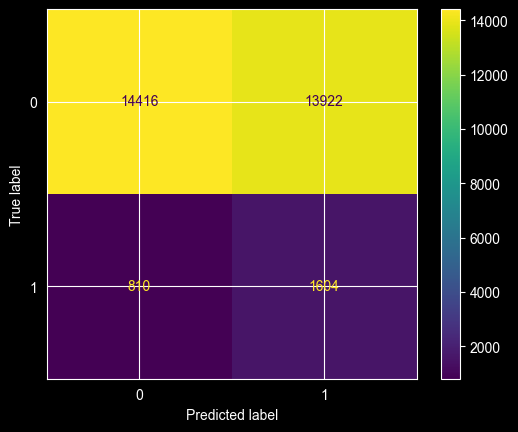

In [78]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
y_pred = tuned_model_lf.predict(scaled_X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print(classification_report(y_test,y_pred))
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tuned_model_lf.classes_)
disp.plot()
plt.show()

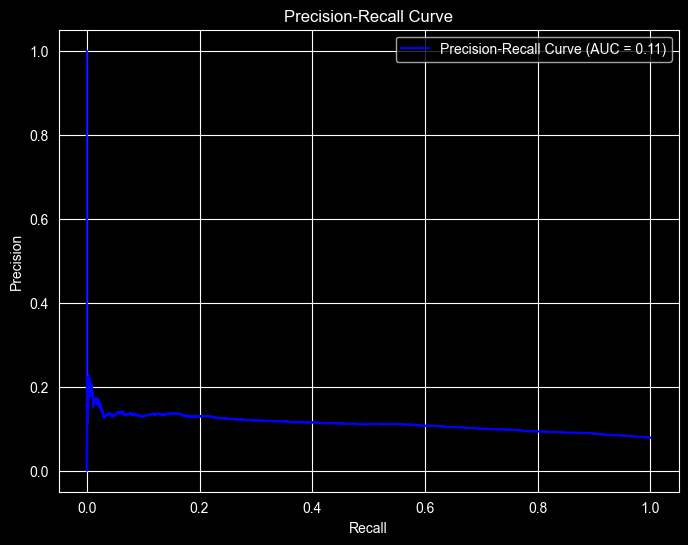

In [80]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

y_probs = tuned_model_lf.predict_proba(scaled_X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute area under the curve (AUC) for precision-recall curve
precision_recall_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {precision_recall_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

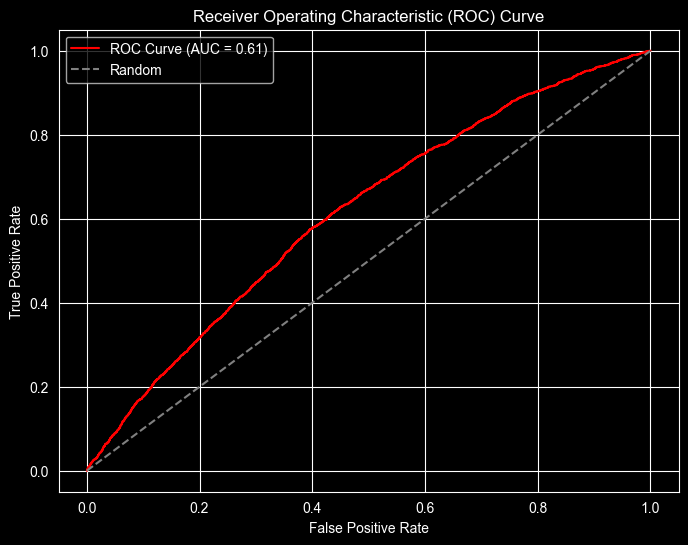

In [81]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_log = roc_auc_score(y_test, tuned_model_lf.predict_proba(scaled_X_test)[:, 1])
print(f"ROC AUC: {roc_auc_log:.4f}")

ROC AUC: 0.6147


In [83]:
from sklearn.metrics import mean_squared_error

mse_log = mean_squared_error(y_test, y_probs)
print(f"Mean Squared Error (MSE): {mse_log:.4f}")

Mean Squared Error (MSE): 0.2500


In [84]:
from sklearn.metrics import log_loss

logloss_log = log_loss(y_test, y_probs)
print(f"Log Loss: {logloss_log:.4f}")

Log Loss: 0.6931


In [85]:
from sklearn.metrics import r2_score

r2_log = r2_score(y_test, y_probs)
print(f"R-squared (R²): {r2_log:.4f}")

R-squared (R²): -2.4560


## Single Decision tree


In [86]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28338
           1       0.21      0.00      0.00      2414

    accuracy                           0.92     30752
   macro avg       0.57      0.50      0.48     30752
weighted avg       0.87      0.92      0.88     30752



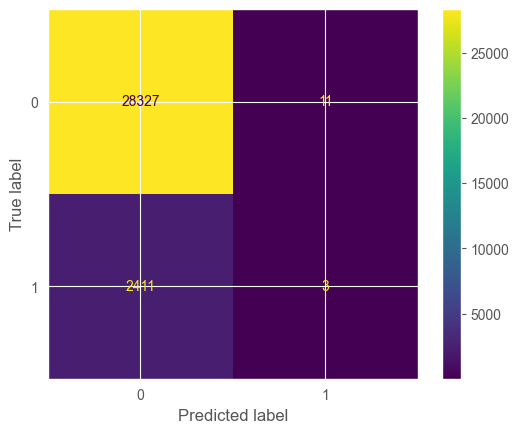

In [87]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
cm_dt=confusion_matrix(y_test,pred_dt)
#print(cm_dt)
plt.style.use('ggplot')

print(classification_report(y_test,pred_dt))
disp2= ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=dt.classes_)


disp2.plot()
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(scaled_X_test)[:, 1])
print(f"ROC AUC: {roc_auc_log:.4f}")

ROC AUC: 0.6147


In [89]:
y_probs_dt = dt.predict_proba(scaled_X_test)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve


roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(scaled_X_test)[:, 1])
print(f"ROC AUC: {roc_auc_dt:.4f}")

from sklearn.metrics import mean_squared_error


mse_dt = mean_squared_error(y_test, y_probs_dt)
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")

from sklearn.metrics import log_loss


logloss_dt = log_loss(y_test, dt.predict_proba(scaled_X_test))
print(f"Log Loss: {logloss_dt:.4f}")

from sklearn.metrics import r2_score


r2_dt = r2_score(y_test, y_probs_dt)
print(f"R-squared (R²): {r2_dt:.4f}")

ROC AUC: 0.6747
Mean Squared Error (MSE): 0.1841
Log Loss: 0.6265
R-squared (R²): -1.5444


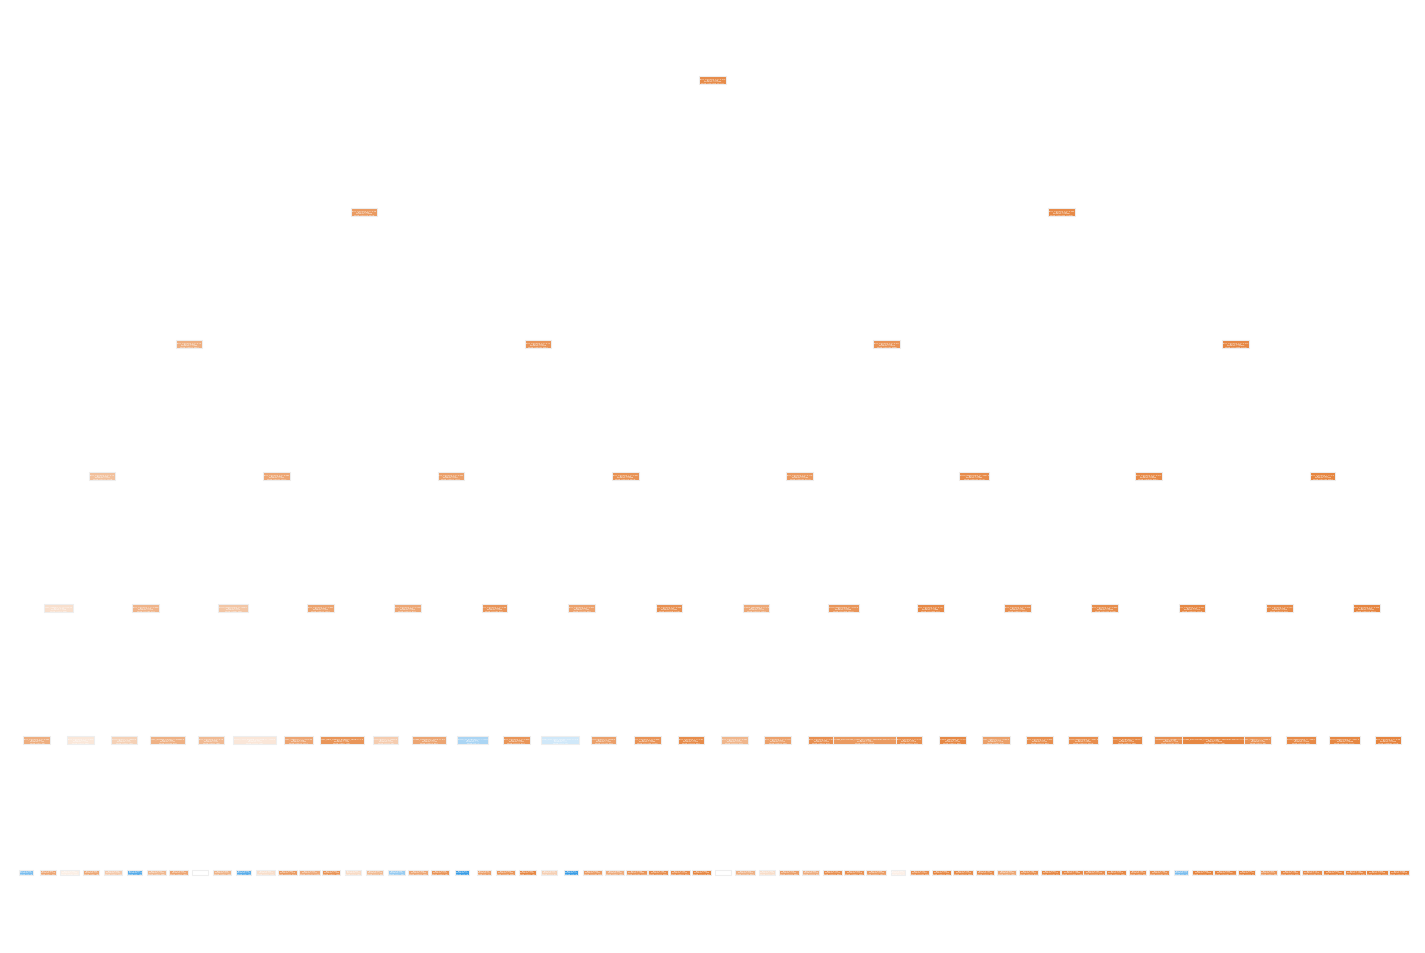

In [90]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8), dpi=150)
plot_tree(dt, filled=True, feature_names=X.columns);

## Random Forest
100 trees

In [91]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [92]:
rf.fit(X_train, y_train)


y_pred_proba = rf.predict_proba(X_test)[:, 1]


mse_rf = mean_squared_error(y_test, y_pred_proba)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
logloss_rf = log_loss(y_test, y_pred_proba)
r2_rf = r2_score(y_test, y_pred_proba)

print(f"MSE: {mse_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")
print(f"Log Loss: {logloss_rf:.4f}")
print(f"R^2: {r2_rf:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


MSE: 0.0684
ROC AUC: 0.7106
Log Loss: 0.2664
R^2: 0.0539


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


#### TUNNING

In [93]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

y_pred_probarf2 = best_rf_model.predict_proba(X_test)[:, 1]

mse_rf2 = mean_squared_error(y_test, y_pred_probarf2)
roc_auc_rf2 = roc_auc_score(y_test, y_pred_probarf2)
logloss_rf2 = log_loss(y_test, y_pred_probarf2)
r2_rf2 = r2_score(y_test, y_pred_probarf2)

print(f"MSE: {mse_rf2:.4f}")
print(f"ROC AUC: {roc_auc_rf2:.4f}")
print(f"Log Loss: {logloss_rf2:.4f}")
print(f"R^2: {r2_rf2:.4f}")

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/v

KeyboardInterrupt: 

## XGBoost


In [95]:
from xgboost import XGBClassifier
best_xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

#grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
best_xgb_model.fit(X_train, y_train)

#best_params_xgb = grid_search.best_params_

#best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb)
#best_xgb_model.fit(X_train, y_train)

y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

mse_xgb = mean_squared_error(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
logloss_xgb= log_loss(y_test, y_pred_proba_xgb)
r2_xgb= r2_score(y_test, y_pred_proba_xgb)

print(f"Best Hyperparameters for XGBoost: {best_xgb_model}")
print(f"ROC AUC for XGBoost on Test Data: {roc_auc_xgb:.4f}")

Best Hyperparameters for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
ROC AUC for XGBoost on Test Data: 0.7559


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'xgb_data' is a DataFrame with the necessary features and target variable.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear= model_linear.predict(X_test)

# Calculate MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
roc_auc_linear=roc_auc_score(y_test, y_pred_linear)
logloss_linear=log_loss(y_test, y_pred_linear)
r2_linear=r2_score(y_test, y_pred_linear)

print(mse_linear)
print(roc_auc_linear)
print(logloss_linear)
print(r2_linear)

0.0693053841702072
0.7467990420633998
0.2928472621684232
0.06334685729842993
0.0693053841702072
0.7467990420633998
0.2928472621684232
0.06334685729842993


In [110]:
performence_index_values = ["XGBoost", "Linear Model", "Logistic Model", "Single Decision Tree", "Random Forest"]
performence_columns_values = ["MSE", "ROC AUC", "Log Loss", "R^2"]

performence = pd.DataFrame(index=performence_index_values, columns=performence_columns_values)
performence.loc["Logistic Model"] = [round(mse_log, 4), round(roc_auc_log, 4), round(logloss_log, 4), round(r2_log, 4)]

performence.loc["Single Decision Tree"] = [round(mse_dt, 4), round(roc_auc_dt, 4), round(logloss_dt, 4), round(r2_dt, 4)]

performence.loc["Random Forest"] = [round(mse_rf, 4), round(roc_auc_rf, 4), round(logloss_rf, 4), round(r2_rf, 4)]

performence.loc["Linear Model"] = [round(mse_linear, 4), round(roc_auc_linear, 4), round(logloss_linear, 4), round(r2_linear, 4)]

performence.loc["XGBoost"] = [round(mse_xgb, 4), round(roc_auc_xgb, 4), round(logloss_xgb, 4), round(r2_xgb, 4)]
file_path ='data/models_performence.csv'  # Replace with your desired file path
performence.to_csv(file_path, index=True)
print(performence)

                         MSE ROC AUC Log Loss     R^2
XGBoost               0.0664  0.7559   0.2423  0.0818
Linear Model          0.0693  0.7468   0.2928  0.0633
Logistic Model          0.25  0.6147   0.6931  -2.456
Single Decision Tree  0.1841  0.6747   0.6265 -1.5444
Random Forest         0.0684  0.7106   0.2664  0.0539


In [ ]:
xgb_data=app_train
print(xgb_data.shape)
%store xgb_data